In [117]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import datetime

from sklearn.model_selection   import train_test_split
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
hospital_male_frm = pd.read_csv("./hospital_male_0729.csv", encoding='cp949')
hospital_female_frm =  pd.read_csv("./hospital_female_0729.csv", encoding='cp949')

In [3]:
# hospital_male_frm["rhm_min_max_dif"] = (hospital_male_frm["avg_rhm"] - hospital_male_frm["min_rhm"]) * 2
# hospital_female_frm["rhm_min_max_dif"] = (hospital_female_frm["avg_rhm"] - hospital_female_frm["min_rhm"])*2
hospital_male_frm["rhm_min_avg_dif"] = (hospital_male_frm["avg_rhm"] - hospital_male_frm["min_rhm"])
hospital_female_frm["rhm_min_avg_dif"] = (hospital_female_frm["avg_rhm"] - hospital_female_frm["min_rhm"])

In [4]:
hospital_male_frm['min_max_Ta'] = hospital_male_frm['max_ta'] - hospital_male_frm['min_ta']
hospital_female_frm['min_max_Ta'] = hospital_female_frm['max_ta'] - hospital_female_frm['min_ta']

In [5]:
hospital_male_frm['min_max_ps'] = hospital_male_frm['max_ps'] - hospital_male_frm['min_ps']
hospital_female_frm['min_max_ps'] = hospital_female_frm['max_ps'] - hospital_female_frm['min_ps']

In [6]:
# 지역 인구대비 질환자 발생비율 컬럼. 10**6을 한 이유는 광역시, 도 단위가 100만 단위로 떨어지기때문에 eda를 위해 곱함
hospital_male_frm["D/R"] = (hospital_male_frm["frequency"]/hospital_male_frm["total_pop"])*(10**6)
hospital_female_frm["D/R"] = (hospital_female_frm["frequency"]/hospital_female_frm["total_pop"])*(10**6)

In [7]:
display(hospital_female_frm[["area","tma","D/R"]])
print()
display(hospital_male_frm[["area","tma","D/R"]])

,area,tma,D/R
0,강원,2012-01-01,3.933823
1,경기,2012-01-01,0.843433
2,경남,2012-01-01,0.608180
3,경북,2012-01-01,0.744904
4,광주,2012-01-01,2.707151
...,...,...,...
31054,전남,2016-12-31,NaN
31055,전북,2016-12-31,NaN
31056,제주,2016-12-31,NaN
31057,충남,2016-12-31,NaN


,area,tma,D/R
0,강원,2012-01-01,3.882400
1,경기,2012-01-01,0.664403
2,경남,2012-01-01,1.200979
3,경북,2012-01-01,4.429192
4,광주,2012-01-01,0.000000
...,...,...,...
31054,전남,2016-12-31,NaN
31055,전북,2016-12-31,NaN
31056,제주,2016-12-31,NaN
31057,충남,2016-12-31,NaN


In [8]:
#질환발생자 없는 날 확인
fail1_frm = hospital_male_frm[hospital_male_frm["D/R"]<=0.001]
fail2_frm = hospital_female_frm[hospital_female_frm["D/R"]<=0.001]
print()
display(fail1_frm[["D/R"]])
print()
display(fail2_frm[["D/R"]])

,D/R
4,0.0
9,0.0
10,0.0
14,0.0
15,0.0
...,...
24829,0.0
24830,0.0
24832,0.0
24834,0.0


,D/R
5,0.0
9,0.0
10,0.0
14,0.0
17,0.0
...,...
24831,0.0
24833,0.0
24834,0.0
24835,0.0


In [9]:
hospital_male_frm

,area,tma,yyyy,mm,dd,avg_ta,max_ta,min_ta,sum_gsr,sum_rn,...,sex,frequency,elderly_pop,total_pop,elderly_ratio,avg_age,rhm_min_avg_dif,min_max_Ta,min_max_ps,D/R
0,강원,2012-01-01,2012.0,1.0,1.0,-4.226027,0.140278,-9.140278,0.000000,0.173611,...,1,3.0,96281.0,772718.0,12.460044,39.4,23.088571,9.280556,6.340000,3.882400
1,경기,2012-01-01,2012.0,1.0,1.0,-3.962264,0.322642,-8.922642,0.000000,0.037736,...,1,4.0,447450.0,6020446.0,7.432174,36.1,25.065517,9.245283,5.500000,0.664403
2,경남,2012-01-01,2012.0,1.0,1.0,0.335897,5.789744,-4.284615,0.000000,0.065789,...,1,2.0,152866.0,1665308.0,9.179443,37.4,19.133333,10.074359,5.200000,1.200979
3,경북,2012-01-01,2012.0,1.0,1.0,-0.666667,4.298246,-5.329825,0.000702,0.721053,...,1,6.0,167115.0,1354649.0,12.336406,39.5,17.005263,9.628070,5.688000,4.429192
4,광주,2012-01-01,2012.0,1.0,1.0,-0.200000,2.880000,-3.620000,0.000000,0.700000,...,1,0.0,55792.0,726529.0,7.679253,35.3,15.400000,6.500000,4.100000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31054,전남,2016-12-31,2016.0,12.0,31.0,2.539189,7.959459,-2.978378,0.000000,0.000000,...,1,NaN,158747.0,951889.0,16.677050,42.6,21.753535,10.937838,2.573333,NaN
31055,전북,2016-12-31,2016.0,12.0,31.0,1.012903,5.864516,-3.435484,0.820968,0.000000,...,1,NaN,139233.0,927505.0,15.011563,41.4,15.777778,9.300000,3.466667,NaN
31056,제주,2016-12-31,2016.0,12.0,31.0,3.997143,7.994286,0.062857,0.000000,0.000000,...,1,NaN,36378.0,322545.0,11.278426,39.2,22.135484,7.931429,3.046667,NaN
31057,충남,2016-12-31,2016.0,12.0,31.0,2.663636,6.903030,-0.693939,1.973636,0.045455,...,1,NaN,146606.0,1064765.0,13.768860,40.7,17.345000,7.596970,2.520000,NaN


In [10]:
hospital_male_frm.insert(5,'weekday',pd.to_datetime(hospital_male_frm.tma).dt.dayofweek)
hospital_female_frm.insert(5,'weekday',pd.to_datetime(hospital_female_frm.tma).dt.dayofweek)



In [11]:
hospital_male_frm.to_csv('./hospital_male_0729_test.csv', encoding='cp949', index=False)

In [12]:
hospital_female_frm.to_csv('./hospital_female_0729_test.csv', encoding='cp949', index=False)

---
## 한파/폭염 컬럼 추가 (컬럼 2개)

- 주의보, 경보 : 각각 나눠서 0(정상),1(주의보),2(경보)
- 한파 : 전날, 당일, 다음날 >  당일에 기입
    - 주의보(1)
        - 최저기온 차 전날 10 이상 & 당일 3도 이하 >> 아래 조건에 영하 12도 있으므로 아래 조건으로 대체
        - 최저기온 오늘, 내일 영하 12도 이하
    - 경보(2)
        - 최저기온 차 전날 15 이상 & 당일 3도 이하 >> 아래 조건에 영하 12도 있으므로 아래 조건으로 대체
        - 최저기온 오늘, 내일 영하 15도 이하

- 폭염 : 전날, 당일 > 당일에 기입
    - 주의보(1)
        - 최고기온 어제, 오늘 33도 이상
    - 경보(2)
        - 최고기온 어제, 오늘 35도 이상



In [13]:
male   = pd.read_csv("./hospital_male_0729_test.csv", encoding='cp949')
female = pd.read_csv("./hospital_female_0729_test.csv", encoding='cp949')

In [111]:
male   = pd.read_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0801_test.csv", encoding='cp949')
female = pd.read_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0801_test.csv", encoding='cp949')

In [98]:
male.tma = pd.to_datetime(male.tma)
female.tma = pd.to_datetime(female.tma)

# 날짜순으로 재정렬(shift 사용 목적)
male = male.sort_values('tma').reset_index(drop=True)
female = female.sort_values('tma').reset_index(drop=True)

In [116]:
import datetime

area_lst = male.area.unique()
area_lst

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

## 기온 하루전, 다음날 더미변수로 생성

In [100]:
for gen in [male, female] :
    for area in area_lst:
        gen.loc[gen.area == area,'max_temp_1b'] = gen.loc[gen.area == area, 'max_temp'].shift(1)   # 하루 전 최고기온
        gen.loc[gen.area == area,'min_temp_1b'] = gen.loc[gen.area == area, 'min_temp'].shift(1)   # 하루 전 최저기온
        gen.loc[gen.area == area,'min_temp_1a'] = gen.loc[gen.area == area, 'min_temp'].shift(-1)  # 다음 날 최저기온

## 폭염(heat_wave)

In [101]:
for gen in [male, female] :
    gen['heat_wave'] = 0

    gen.loc[(gen.max_temp_1b >= 33) & (gen.max_temp >= 33), 'heat_wave'] = 1
    gen.loc[(gen.max_temp_1b >= 35) & (gen.max_temp >= 35), 'heat_wave'] = 2

## 한파(cold_wave)

In [102]:
for gen in [male, female] :
    gen['cold_wave'] = 0
    
    gen.loc[(gen.min_temp <= -12) & (gen.min_temp_1a <= -12), 'cold_wave'] = 1
    gen.loc[(gen.min_temp - gen.min_temp_1b <= -10) & (gen.min_temp <= 3), 'cold_wave'] = 1 
    gen.loc[(gen.min_temp <= -15) & (gen.min_temp_1a <= -15), 'cold_wave'] = 2
    gen.loc[(gen.min_temp - gen.min_temp_1b <= -15) & (gen.min_temp <= 3), 'cold_wave'] = 2

In [104]:
display(male[['heat_wave','cold_wave']].head())
display(female[['heat_wave','cold_wave']].head())

,heat_wave,cold_wave
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


,heat_wave,cold_wave
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


다음날의 데이터가 없는 2016년 12월 31일의 경우 min_ta 값이 전지역 모두 영하12도 이상으로 해당 변수에서 '정상'에 해당하므로 0으로 처리

In [105]:
female[(female.yyyy == 2016) & (female.mm == 12)].iloc[-20:]

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,max_hum,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp,max_temp_1b,min_temp_1b,min_temp_1a
31566,제주,2016-12-30,2016,12,30,4,0.000000,0.000000,1031.207692,1033.437500,...,70.0000,58.927365,27.0000,2.30000,10.60000,5.573649,8.30,8.1000,3.3000,2.5
31567,충남,2016-12-30,2016,12,30,4,2.261818,0.000000,1033.133333,1035.320000,...,90.0000,66.938063,54.0000,-10.00000,3.20000,-2.193806,13.20,2.3000,-5.0000,-4.0
31568,광주,2016-12-30,2016,12,30,4,0.000000,0.000000,1032.950000,1035.200000,...,85.0000,64.324324,50.0000,-4.00000,5.00000,0.979730,9.00,4.0000,-2.0000,-2.0
31569,충남,2016-12-31,2016,12,31,5,1.973636,0.045455,1030.100000,1031.333333,...,95.0000,75.118243,41.0000,-4.00000,7.70000,1.146847,11.70,3.2000,-10.0000,NaN
31570,강원,2016-12-31,2016,12,31,5,0.000000,0.000000,1029.540000,1030.965217,...,90.0000,62.199324,59.0000,-6.30000,8.00000,0.255985,14.30,5.1000,-15.3000,NaN
31571,경기,2016-12-31,2016,12,31,5,0.000000,0.000000,1030.100000,1031.700000,...,85.0000,71.266216,30.0000,-4.80000,6.00000,0.042973,10.80,3.0000,-11.8000,NaN
31572,경남,2016-12-31,2016,12,31,5,1.184750,0.000000,1030.050000,1031.825000,...,85.0000,58.724903,55.0000,-5.50000,9.00000,2.402703,14.50,7.1000,-7.0000,NaN
31573,경북,2016-12-31,2016,12,31,5,-0.174211,0.000000,1029.647619,1031.186364,...,82.6875,65.440452,37.4375,-3.26875,7.68125,2.112884,10.95,5.0625,-7.3875,NaN
31574,대구,2016-12-31,2016,12,31,5,13.577500,0.000000,1029.633333,1031.233333,...,70.0000,51.844595,28.0000,-0.90000,7.80000,3.047973,8.70,5.1000,-3.4000,NaN
31575,대전,2016-12-31,2016,12,31,5,0.000000,0.000000,1030.700000,1032.300000,...,90.0000,77.047297,33.0000,-4.60000,5.60000,0.408784,10.20,3.4000,-11.6000,NaN


## 더미변수 drop (max_temp_1b, min_temp_1b, min_temp_1a)

In [106]:
male.drop(columns = ['max_temp_1b', 'min_temp_1b', 'min_temp_1a'], inplace=True)
female.drop(columns = ['max_temp_1b', 'min_temp_1b', 'min_temp_1a'], inplace=True)

## csv 파일로 저장

In [107]:
male = male.sort_values(['tma', 'area']).reset_index(drop=True)
female = female.sort_values(['tma', 'area']).reset_index(drop=True)

In [108]:
male

,area,tma,yyyy,mm,dd,weekday,sum_gsr,sum_rn,avg_ps,max_ps,...,heat_wave,cold_wave,min_hum,max_hum,avg_hum,diff_hum,min_temp,max_temp,avg_temp,diff_temp
0,강원,2011-12-01,2011,12,1,3,0.108493,3.038889,1027.575000,1029.025000,...,0,0,66.685294,100.000000,83.354839,33.314706,-0.271831,3.573239,1.281944,3.845070
1,경기,2011-12-01,2011,12,1,3,0.024151,0.009434,1025.875000,1027.300000,...,0,0,51.334483,79.562069,65.448276,28.227586,3.124528,8.537736,5.360377,5.413208
2,경남,2011-12-01,2011,12,1,3,0.000000,1.789474,1023.921429,1025.135714,...,0,0,64.800000,84.366667,74.583333,19.566667,4.946154,8.058974,6.394872,3.112821
3,경북,2011-12-01,2011,12,1,3,0.000000,2.185965,1026.137500,1027.348000,...,0,0,66.600000,95.400000,81.000000,28.800000,2.923636,6.261818,4.429091,3.338182
4,광주,2011-12-01,2011,12,1,3,0.000000,3.200000,1022.900000,1024.300000,...,0,0,76.933333,100.000000,89.000000,23.066667,4.740000,8.580000,6.240000,3.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31581,전남,2016-12-31,2016,12,31,5,0.000000,0.000000,1030.607692,1031.926667,...,0,0,40.000000,89.000000,65.555094,49.000000,-4.700000,9.000000,2.666684,13.700000
31582,전북,2016-12-31,2016,12,31,5,0.820968,0.000000,1030.586667,1032.373333,...,0,0,45.000000,87.000000,72.161486,42.000000,-7.000000,7.500000,1.019392,14.500000
31583,제주,2016-12-31,2016,12,31,5,0.000000,0.000000,1029.900000,1031.580000,...,0,0,45.000000,76.000000,60.569257,31.000000,2.500000,10.500000,7.058615,8.000000
31584,충남,2016-12-31,2016,12,31,5,1.973636,0.045455,1030.100000,1031.333333,...,0,0,54.000000,95.000000,75.118243,41.000000,-4.000000,7.700000,1.146847,11.700000


In [109]:
# 2022.08.01. 파일 덮어씌움

male.to_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0801_test.csv", encoding='cp949', index=False)
female.to_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0801_test.csv", encoding='cp949', index=False)

## pm10 지연효과 파생변수 생성
- 3일전(3b), 7일전(7b), 31일전(31b)
- data 없는 경우 NaN 으로 둘 예정

In [112]:
male   = pd.read_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0801_test.csv", encoding='cp949')
female = pd.read_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0801_test.csv", encoding='cp949')

In [118]:
male.tma = pd.to_datetime(male.tma)
female.tma = pd.to_datetime(female.tma)

# 날짜순으로 재정렬(shift 사용 목적)
male = male.sort_values('tma').reset_index(drop=True)
female = female.sort_values('tma').reset_index(drop=True)

# 지역 리스트 생성
area_lst = male.area.unique()
area_lst

array(['강원', '충북', '충남', '제주', '전북', '인천', '울산', '세종', '전남', '부산', '대전',
       '대구', '광주', '경북', '경남', '경기', '서울'], dtype=object)

In [114]:
male.columns

Index(['area', 'tma', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'sex', 'frequency',
       'elderly_pop', 'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps',
       'D/R', 'heat_wave', 'cold_wave', 'min_hum', 'max_hum', 'avg_hum',
       'diff_hum', 'min_temp', 'max_temp', 'avg_temp', 'diff_temp'],
      dtype='object')

In [127]:
for gen in [male, female] :
    for area in area_lst:
        gen.loc[gen.area == area,'pm10_3b'] = gen.loc[gen.area == area, 'pm10'].shift(3)  # 3일 전
        gen.loc[gen.area == area,'pm10_7b'] = gen.loc[gen.area == area, 'pm10'].shift(7)  # 7일 전
        gen.loc[gen.area == area,'pm10_31b'] = gen.loc[gen.area == area, 'pm10'].shift(31)  # 31일 전

In [129]:
male.loc[male.area == '강원',['area','tma','pm10','pm10_3b', 'pm10_7b', 'pm10_31b']][:60]

,area,tma,pm10,pm10_3b,pm10_7b,pm10_31b
0,강원,2011-12-01,15.678261,NaN,NaN,NaN
32,강원,2011-12-02,16.787500,NaN,NaN,NaN
49,강원,2011-12-03,9.787500,NaN,NaN,NaN
61,강원,2011-12-04,34.941667,15.678261,NaN,NaN
84,강원,2011-12-05,44.916667,16.787500,NaN,NaN
100,강원,2011-12-06,46.516123,9.787500,NaN,NaN
117,강원,2011-12-07,65.415476,34.941667,NaN,NaN
135,강원,2011-12-08,55.154167,44.916667,15.678261,NaN
151,강원,2011-12-09,37.008333,46.516123,16.787500,NaN
168,강원,2011-12-10,38.954167,65.415476,9.787500,NaN


In [130]:
female.loc[female.area == '강원',['area','tma','pm10','pm10_3b', 'pm10_7b', 'pm10_31b']][:60]

,area,tma,pm10,pm10_3b,pm10_7b,pm10_31b
0,강원,2011-12-01,15.678261,NaN,NaN,NaN
32,강원,2011-12-02,16.787500,NaN,NaN,NaN
49,강원,2011-12-03,9.787500,NaN,NaN,NaN
61,강원,2011-12-04,34.941667,15.678261,NaN,NaN
84,강원,2011-12-05,44.916667,16.787500,NaN,NaN
100,강원,2011-12-06,46.516123,9.787500,NaN,NaN
117,강원,2011-12-07,65.415476,34.941667,NaN,NaN
135,강원,2011-12-08,55.154167,44.916667,15.678261,NaN
151,강원,2011-12-09,37.008333,46.516123,16.787500,NaN
168,강원,2011-12-10,38.954167,65.415476,9.787500,NaN


## 기존 데이터의 frequency 삭제 후 다시 merge
- D/R 변수선택시 제외되므로 데이터 수정없이 진행

In [158]:
# male.columns 'area', 'tma','sex'
hospital = pd.read_csv('Z:/공모전/날씨빅데이터콘테스트(공유)/hospital_data/back_hospital_new.csv', encoding='cp949')
hospital = hospital.iloc[:,1:]
hospital.columns = ['tma','area','sex','frequency']
hospital.tma = hospital.tma.apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
hospital.head()

,tma,area,sex,frequency
0,2012-01-01,강원,1,3
1,2012-01-01,강원,2,3
2,2012-01-01,경기,1,4
3,2012-01-01,경기,2,5
4,2012-01-01,경남,1,2


In [140]:
# 기존 test data 의 frequency 컬럼 삭제 (male, female)
male.drop('frequency', axis=1, inplace=True)
female.drop('frequency', axis=1, inplace=True)

male.columns

Index(['area', 'tma', 'yyyy', 'mm', 'dd', 'weekday', 'sum_gsr', 'sum_rn',
       'avg_ps', 'max_ps', 'min_ps', 'so2', 'o3', 'pm10', 'sex', 'elderly_pop',
       'total_pop', 'elderly_ratio', 'avg_age', 'min_max_ps', 'D/R',
       'heat_wave', 'cold_wave', 'min_hum', 'max_hum', 'avg_hum', 'diff_hum',
       'min_temp', 'max_temp', 'avg_temp', 'diff_temp', 'pm10_3b', 'pm10_7b',
       'pm10_31b'],
      dtype='object')

In [161]:
male_merged = male.merge(hospital, how='left', on = ['area','tma','sex'])
female_merged = female.merge(hospital, how='left', on = ['area','tma','sex'])

In [170]:
null_chk = pd.concat([male_merged.isnull().sum(), female_merged.isnull().sum()], axis=1)
null_chk

,0,1
area,0,0
tma,0,0
yyyy,0,0
mm,0,0
dd,0,0
weekday,0,0
sum_gsr,0,0
sum_rn,0,0
avg_ps,0,0
max_ps,0,0


## D/R 컬럼 추가 수정

In [190]:
male_merged['D/R'] = (male_merged.frequency / male_merged.total_pop) * (10**6)
female_merged['D/R'] = (female_merged.frequency / female_merged.total_pop) * (10**6)

In [192]:
male_merged[['tma','frequency', 'total_pop','D/R']][:600]

,tma,frequency,total_pop,D/R
0,2011-12-01,NaN,773278,NaN
1,2011-12-01,NaN,787981,NaN
2,2011-12-01,NaN,1063012,NaN
3,2011-12-01,NaN,288152,NaN
4,2011-12-01,NaN,934002,NaN
...,...,...,...,...
595,2012-01-05,1.0,788127,1.268831
596,2012-01-05,1.0,1064012,0.939839
597,2012-01-05,0.0,288378,0.000000
598,2012-01-05,0.0,933775,0.000000


<AxesSubplot:>

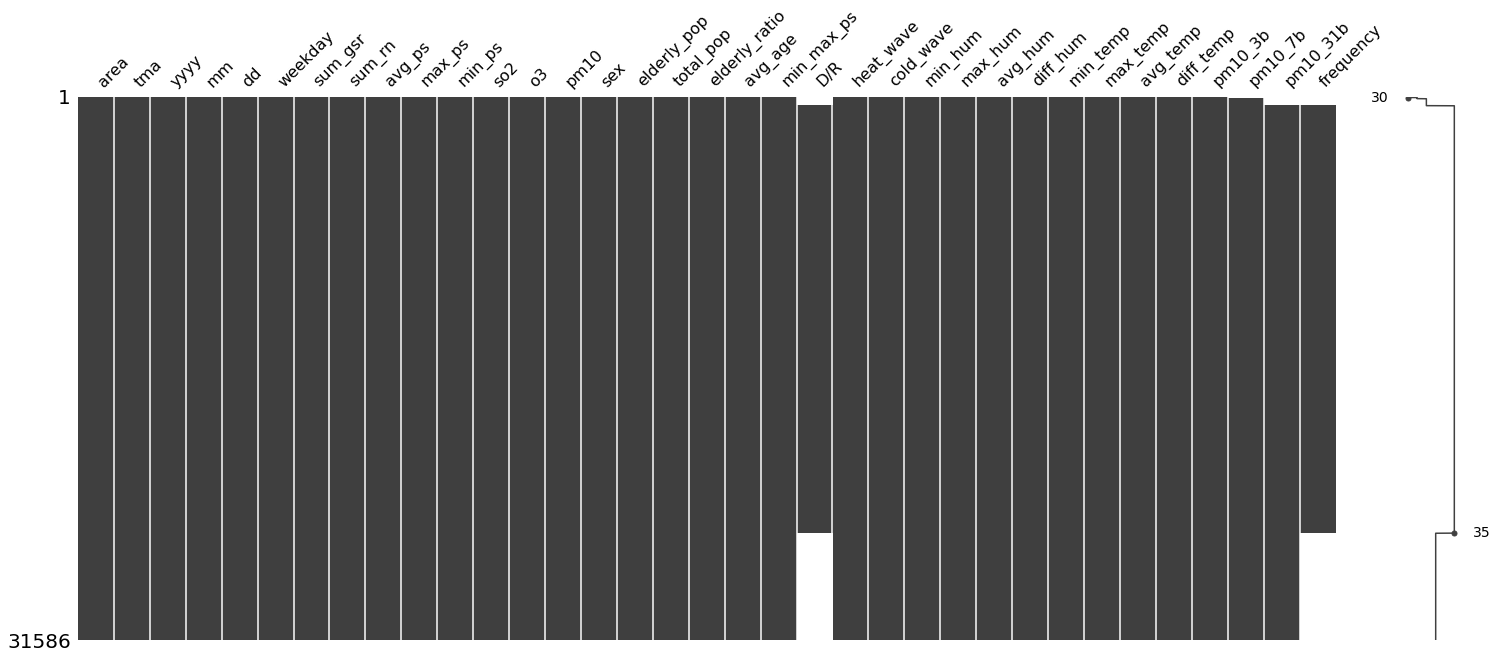

In [193]:
msno.matrix(male_merged)

<AxesSubplot:>

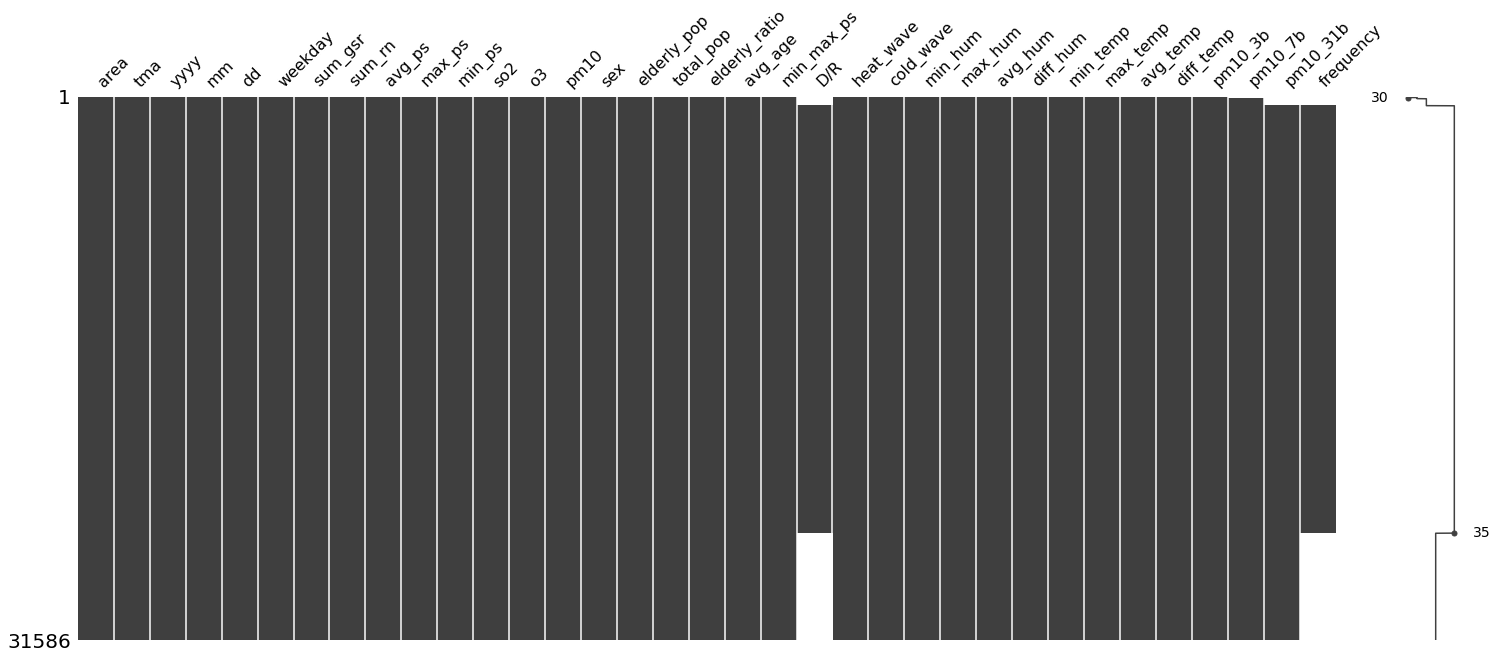

In [194]:
msno.matrix(female_merged)

In [197]:
male_merged.to_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_male_0802_test.csv", encoding='cp949', index=False)
female_merged.to_csv("Z:/공모전/날씨빅데이터콘테스트(공유)/data/test/hospital_female_0802_test.csv", encoding='cp949', index=False)